In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Type C calibration_corrected_temp.xlsx')
df.head()

,T,mV
0,77.15,-1.870959
1,77.25,-1.870931
2,77.35,-1.870902
3,77.45,-1.870873
4,77.55,-1.870843


In [3]:

# rng = numpy.random

# # Parameters
# learning_rate = 0.01
# training_epochs = 1000
# display_step = 50

# # Training Data
# # train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
# #                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# train_X = df['mV'].values
# # train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
# #                          2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# train_Y = df['T']


# n_samples = train_X.shape[0]

# # tf Graph Input
# X = tf.placeholder("float")
# Y = tf.placeholder("float")

# # Set model weights
# W = tf.Variable(rng.randn(), name="weight")
# b = tf.Variable(rng.randn(), name="bias")

# # Construct a linear model
# pred = tf.add(tf.multiply(X, W), b)

# # Mean squared error
# # cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# # Gradient descent
# #  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# # Initialize the variables (i.e. assign their default value)
# init = tf.global_variables_initializer()

# # Start training
# with tf.Session() as sess:

#     # Run the initializer
#     sess.run(init)

#     # Fit all training data
#     for epoch in range(training_epochs):
#         for (x, y) in zip(train_X, train_Y):
#             sess.run(optimizer, feed_dict={X: x, Y: y})

#         # Display logs per epoch step
#         if (epoch+1) % display_step == 0:
#             c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
#             print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
#                 "W=", sess.run(W), "b=", sess.run(b))

#     print("Optimization Finished!")
#     training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
#     print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

#     # Graphic display
#     plt.plot(train_X, train_Y, 'ro', label='Original data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
#     plt.show()

#     # Testing example, as requested (Issue #2)
# #     test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
# #     test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
#     test_X = df['mV'].values
#     test_Y = df['T'].values
#     print("Testing... (Mean square loss Comparison)")
#     testing_cost = sess.run(
#         tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
#         feed_dict={X: test_X, Y: test_Y})  # same function as cost above
#     print("Testing cost=", testing_cost)
#     print("Absolute mean square loss difference:", abs(
#         training_cost - testing_cost))

#     plt.plot(test_X, test_Y, 'bo', label='Testing data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
# plt.show()

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()

reg.fit(df['mV'].reshape(-1,1), df['T'].values.reshape(-1,1))

y_pred = reg.predict(df['mV'].reshape(-1,1))
print('reg coef: {0}\nintercept: {1}'.format(reg.coef_, reg.intercept_))
print('MSE: {0}'.format(mean_squared_error(df['T'].values.reshape(-1,1), y_pred)))


reg coef: [[ 59.31890329]]
intercept: [ 241.15599006]
MSE: 2512.688085268828


C:\Users\manolis\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\manolis\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


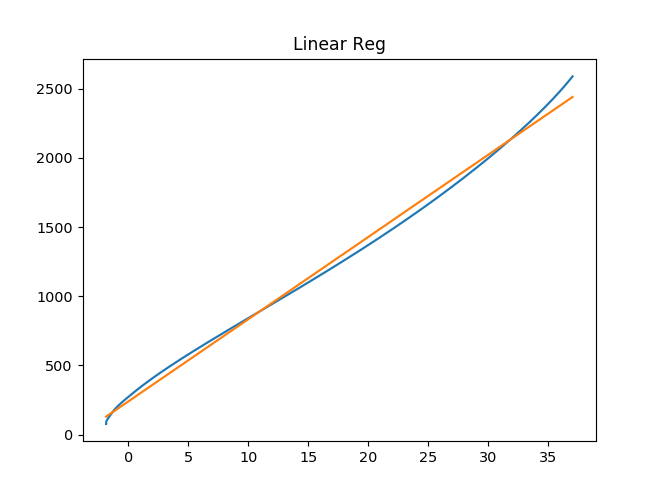

In [7]:
fig, ax = plt.subplots()
ax.plot(df['mV'], df['T'], df['mV'], y_pred)
plt.title('Linear Reg')

reg coef: [[ 59.31889534]]
intercept: [ 241.15613631]
MSE: 2512.6880852782165


C:\Users\manolis\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\manolis\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


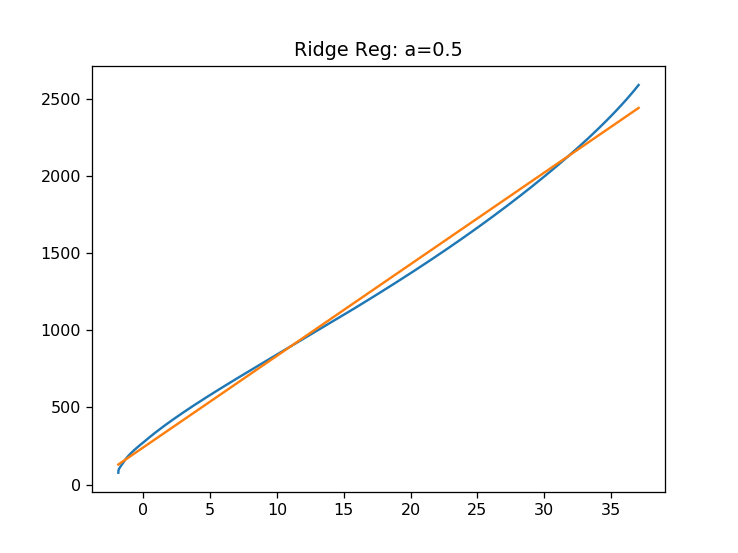

In [17]:
# Ridge Regression
alpha= 0.5
reg = linear_model.Ridge(alpha=alpha)
reg.fit(df['mV'].reshape(-1,1), df['T'].values.reshape(-1,1))

y_pred = reg.predict(df['mV'].reshape(-1,1))
print('reg coef: {0}\nintercept: {1}'.format(reg.coef_, reg.intercept_))
print('MSE: {0}'.format(mean_squared_error(df['T'].values.reshape(-1,1), y_pred)))
fig, ax = plt.subplots()
ax.plot(df['mV'], df['T'], df['mV'], y_pred)
plt.title('Ridge Reg: a={0}'.format(alpha))

deg: 0 MSE: 525426.7491669025
deg: 1 MSE: 189159634.7829909
deg: 2 MSE: 91003333444.9167
deg: 3 MSE: 53126034929506.45
deg: 4 MSE: 3.755982412240932e+16
deg: 5 MSE: 3.00519519567236e+19
deg: 6 MSE: 2.6168403187044738e+22
deg: 7 MSE: 2.4232607048578173e+25
deg: 8 MSE: 2.351450947106488e+28
deg: 9 MSE: 2.367248440036068e+31


<IPython.core.display.Javascript object>


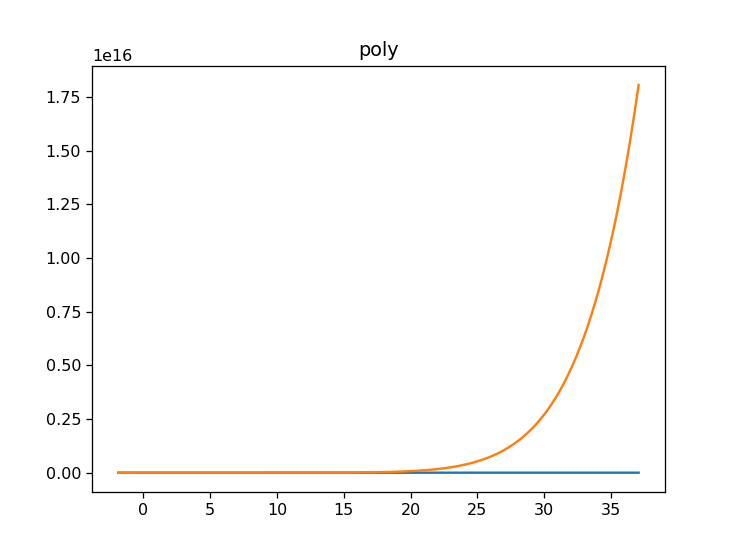

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def poly(coefs, df):
    pol = 0
    for k, v in enumerate(coefs):
        pol = v*(df['mV']**k) + pol
    return pol
for deg in range(10):

    model = Pipeline([('poly', PolynomialFeatures(degree=deg)), ('linear', LinearRegression(fit_intercept=False))])
     # fit to an order-3 polynomial data
    # x = np.arange(5)
    x = df['mV']
    y = df['T']
    # y = 3 - 2 * x + x ** 2 - x ** 3
    model = model.fit(np.tanh(x[:, np.newaxis])*1/(np.tanh(x[:, np.newaxis])), y)
    coefs = model.named_steps['linear'].coef_

    print('deg: {0} MSE: {1}'.format(deg, mean_squared_error(df['T'].values.reshape(-1,1), poly(coefs, df))))
fig, ax = plt.subplots()
plt.title('poly')
ax.plot(df['mV'], df['T'], df['mV'], poly(coefs, df))

<IPython.core.display.Javascript object>


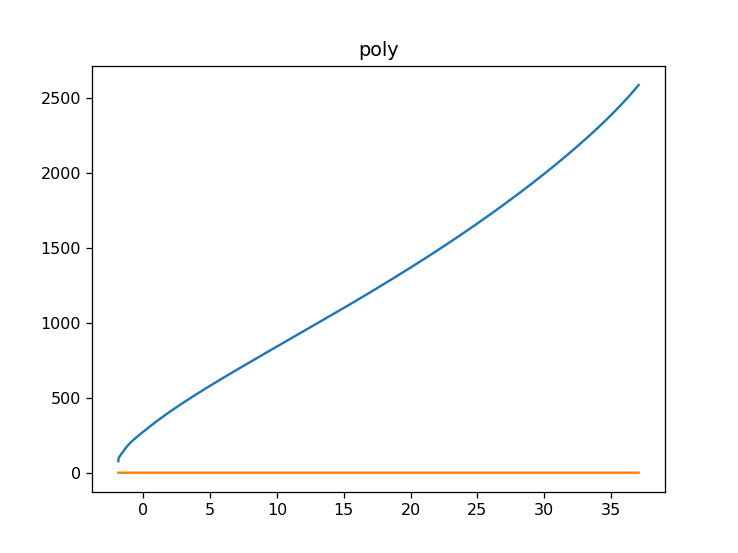

In [45]:
fig, ax = plt.subplots()
plt.title('poly')
ax.plot(df['mV'], df['T'], df['mV'], poly(coefs, df))

<IPython.core.display.Javascript object>


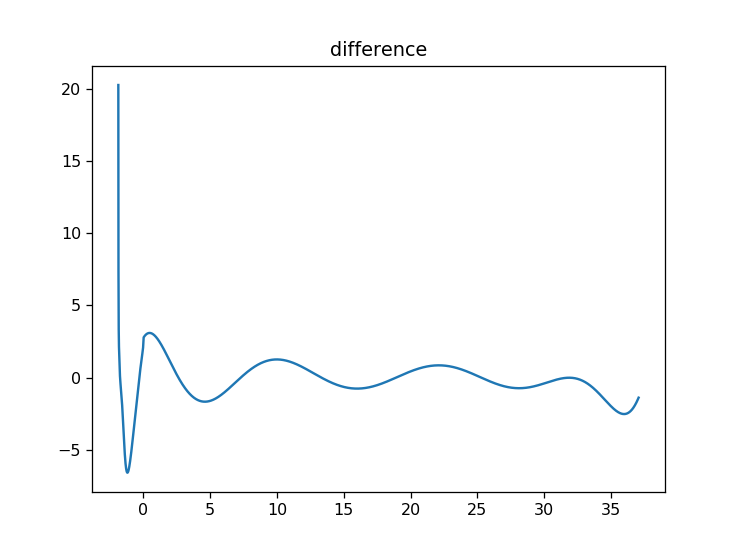

In [38]:
d = poly(coefs, df) - df['T']
fig, ax = plt.subplots()
plt.title('difference')
ax.plot(df['mV'], d)


deg: 0 MSE: 2301975.7070148173
deg: 1 MSE: 2302518.0820074873
deg: 2 MSE: 2302550.609237209
deg: 3 MSE: 2302565.2202231213
deg: 4 MSE: 2302564.1429112577
deg: 5 MSE: 2302564.777543645
deg: 6 MSE: 2302564.7232570793
deg: 7 MSE: 2302564.7387156147
deg: 8 MSE: 2302564.7414372335
deg: 9 MSE: 2302565.3165300167


<IPython.core.display.Javascript object>


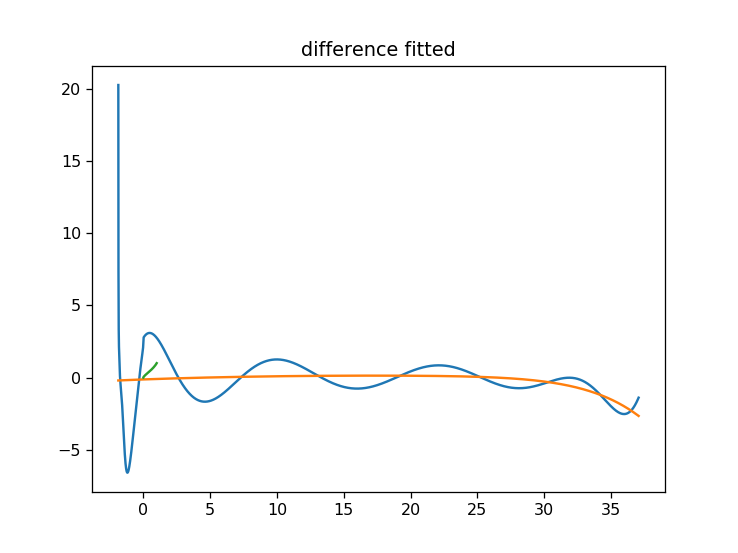

In [50]:
for deg in range(10):
    model = Pipeline([('poly', PolynomialFeatures(degree=deg)), ('linear', LinearRegression(fit_intercept=False))])
     # fit to an order-3 polynomial data
    # x = np.arange(5)
    x = df['mV']
    y = d
    # y = 3 - 2 * x + x ** 2 - x ** 3
    model = model.fit(x[:, np.newaxis], y)
    coefs = model.named_steps['linear'].coef_

    print('deg: {0} MSE: {1}'.format(deg, mean_squared_error(df['T'].values.reshape(-1,1), poly(coefs, df))))
fig, ax = plt.subplots()
plt.title('difference fitted')
ax.plot(df['mV'], d, df['mV'],poly(coefs, df))

In [57]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(df['T'].values.reshape(-1,1))
t_train = minmaxscaler.transform(df['T'].values.reshape(-1,1))

minmaxscaler.fit(df['mV'].values.reshape(-1,1))
mv_train = minmaxscaler.transform(df['mV'].values.reshape(-1,1))

<IPython.core.display.Javascript object>


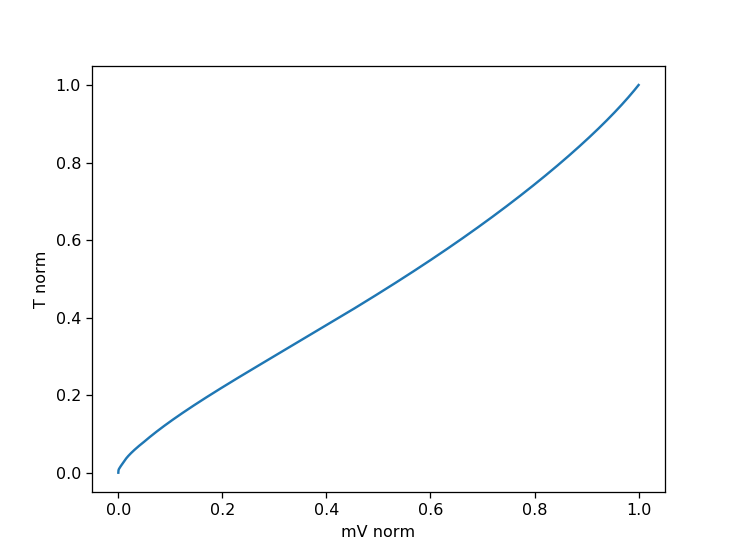

In [62]:
fig,ax = plt.subplots()
ax.plot(mv_train, t_train)
plt.xlabel('mV norm')
plt.ylabel('T norm')

Iteration 1, loss = 0.04147188
Iteration 2, loss = 0.00836848
Iteration 3, loss = 0.00168463
Iteration 4, loss = 0.00042258
Iteration 5, loss = 0.00020305
Iteration 6, loss = 0.00016620
Iteration 7, loss = 0.00015998
Iteration 8, loss = 0.00015877
Iteration 9, loss = 0.00015837
Iteration 10, loss = 0.00015810
Iteration 11, loss = 0.00015788
Iteration 12, loss = 0.00015765
Iteration 13, loss = 0.00015740
Iteration 14, loss = 0.00015719
Iteration 15, loss = 0.00015700
Iteration 16, loss = 0.00015675
Iteration 17, loss = 0.00015656
Iteration 18, loss = 0.00015632
Iteration 19, loss = 0.00015610
Iteration 20, loss = 0.00015594
Iteration 21, loss = 0.00015570
Iteration 22, loss = 0.00015550
Iteration 23, loss = 0.00015533
Iteration 24, loss = 0.00015510
Iteration 25, loss = 0.00015494
Iteration 26, loss = 0.00015470
Iteration 27, loss = 0.00015446
Iteration 28, loss = 0.00015428
Iteration 29, loss = 0.00015411
Iteration 30, loss = 0.00015388
Iteration 31, loss = 0.00015370
Iteration 32, los

C:\Users\manolis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MSE: 0.0002602359064573629


<IPython.core.display.Javascript object>


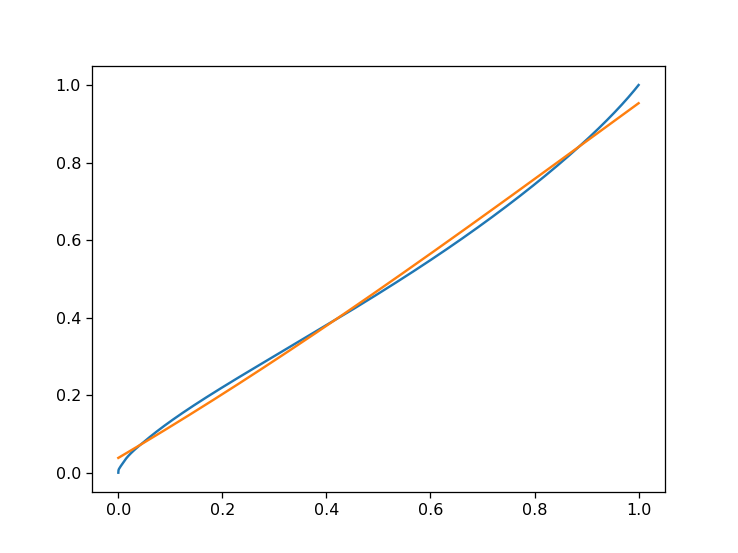

In [92]:
from sklearn.neural_network import MLPRegressor as mlp
reg = mlp(hidden_layer_sizes=(1000,3 ),solver='sgd',tol=1e-10,activation='tanh', learning_rate='constant', verbose=True, warm_start=False, shuffle=True)
reg.fit(mv_train, t_train.ravel())
print('MSE: {0}'.format(mean_squared_error(t_train.ravel(),reg.predict(mv_train))))
fig,ax = plt.subplots()
ax.plot(mv_train, t_train, mv_train,reg.predict(mv_train))

